## Incidence de la varicelle en France métropolitaine

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles sur le site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202207          7  13531     9776   17286      20          14   
1     202206          7   9935     7104   12766      15          11   
2     202205          7  10851     7797   13905      16          11   
3     202204          7   9547     6721   12373      14          10   
4     202203          7  13972    10680   17264      21          16   
5     202202          7   8495     6026   10964      13           9   
6     202201          7  13793    10597   16989      21          16   
7     202152          7  13239     9611   16867      20          15   
8     202151          7  13326     9629   17023      20          14   
9     202150          7  14128    10312   17944      21          15   
10    202149          7  13674    10369   16979      21          16   
11    202148          7  11549     8503   14595      17          12   
12    202147          7  11419     8376   14462      17          12   
13    202146          7   8216     5724   10708      12           8   
14    202145          7   8965     6468   11462      14          10   
15    202144          7   8736     5636   11836      13           8   
16    202143          7   8145     5164   11126      12           7   
17    202142          7   9443     6037   12849      14           9   
18    202141          7   4021     2239    5803       6           3   
19    202140          7   4441     2454    6428       7           4   
20    202139          7   2291     1056    3526       3           1   
21    202138          7   4325     2267    6383       7           4   
22    202137          7   1964      754    3174       3           1   
23    202136          7   3441     1730    5152       5           2   
24    202135          7   2562     1107    4017       4           2   
25    202134          7   1429      378    2480       2           0   
26    202133          7   3829     1830    5828       6           3   
27    202132          7   4108     1895    6321       6           3   
28    202131          7   4793     2301    7285       7           3   
29    202130          7   7190     4191   10189      11           6   
...      ...        ...    ...      ...     ...     ...         ...   
1599  199126          7  17608    11304   23912      31          20   
1600  199125          7  16169    10700   21638      28          18   
1601  199124          7  16171    10071   22271      28          17   
1602  199123          7  11947     7671   16223      21          13   
1603  199122          7  15452     9953   20951      27          17   
1604  199121          7  14903     8975   20831      26          16   
1605  199120          7  19053    12742   25364      34          23   
1606  199119          7  16739    11246   22232      29          19   
1607  199118          7  21385    13882   28888      38          25   
1608  199117          7  13462     8877   18047      24          16   
1609  199116          7  14857    10068   19646      26          18   
1610  199115          7  13975     9781   18169      25          18   
1611  199114          7  12265     7684   16846      22          14   
1612  199113          7   9567     6041   13093      17          11   
1613  199112          7  10864     7331   14397      19          13   
1614  199111          7  15574    11184   19964      27          19   
1615  199110          7  16643    11372   21914      29          20   
1616  199109          7  13741     8780   18702      24          15   
1617  199108          7  13289     8813   17765      23          15   
1618  199107          7  12337     8077   16597      22          15   
1619  199106          7  10877     7013   14741      19          12   
1620  199105          7  10442     6544   14340      18          11   
1621  199104          7   7913     4563   11263      14           8   
1622  199103          7  15387    10484   20290      27          18   
1623  199102          7  16277  

Nous allons maintenant inspecter les données afin de voir s'il y a des données manquantes: Il semble que ce ne soit pas le cas à première vue. 

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202207          7  13531     9776   17286      20          14   
1     202206          7   9935     7104   12766      15          11   
2     202205          7  10851     7797   13905      16          11   
3     202204          7   9547     6721   12373      14          10   
4     202203          7  13972    10680   17264      21          16   
5     202202          7   8495     6026   10964      13           9   
6     202201          7  13793    10597   16989      21          16   
7     202152          7  13239     9611   16867      20          15   
8     202151          7  13326     9629   17023      20          14   
9     202150          7  14128    10312   17944      21          15   
10    202149          7  13674    10369   16979      21          16   
11    202148          7  11549     8503   14595      17          12   
12    202147          7  11419     8376   14462      17          12   
13    202146          7   8216     5724   10708      12           8   
14    202145          7   8965     6468   11462      14          10   
15    202144          7   8736     5636   11836      13           8   
16    202143          7   8145     5164   11126      12           7   
17    202142          7   9443     6037   12849      14           9   
18    202141          7   4021     2239    5803       6           3   
19    202140          7   4441     2454    6428       7           4   
20    202139          7   2291     1056    3526       3           1   
21    202138          7   4325     2267    6383       7           4   
22    202137          7   1964      754    3174       3           1   
23    202136          7   3441     1730    5152       5           2   
24    202135          7   2562     1107    4017       4           2   
25    202134          7   1429      378    2480       2           0   
26    202133          7   3829     1830    5828       6           3   
27    202132          7   4108     1895    6321       6           3   
28    202131          7   4793     2301    7285       7           3   
29    202130          7   7190     4191   10189      11           6   
...      ...        ...    ...      ...     ...     ...         ...   
1599  199126          7  17608    11304   23912      31          20   
1600  199125          7  16169    10700   21638      28          18   
1601  199124          7  16171    10071   22271      28          17   
1602  199123          7  11947     7671   16223      21          13   
1603  199122          7  15452     9953   20951      27          17   
1604  199121          7  14903     8975   20831      26          16   
1605  199120          7  19053    12742   25364      34          23   
1606  199119          7  16739    11246   22232      29          19   
1607  199118          7  21385    13882   28888      38          25   
1608  199117          7  13462     8877   18047      24          16   
1609  199116          7  14857    10068   19646      26          18   
1610  199115          7  13975     9781   18169      25          18   
1611  199114          7  12265     7684   16846      22          14   
1612  199113          7   9567     6041   13093      17          11   
1613  199112          7  10864     7331   14397      19          13   
1614  199111          7  15574    11184   19964      27          19   
1615  199110          7  16643    11372   21914      29          20   
1616  199109          7  13741     8780   18702      24          15   
1617  199108          7  13289     8813   17765      23          15   
1618  199107          7  12337     8077   16597      22          15   
1619  199106          7  10877     7013   14741      19          12   
1620  199105          7  10442     6544   14340      18          11   
1621  199104          7   7913     4563   11263      14           8   
1622  199103          7  15387    10484   20290      27          18   
1623  199102          7  16277  

Il restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [6]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde. Ceci s'avère tout à fait juste.

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Nous pouvons maintenant commencer à regarder les données

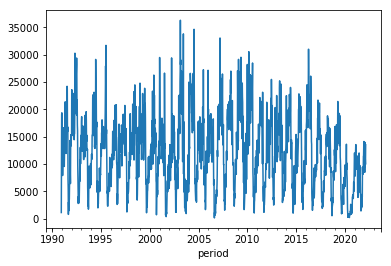

In [8]:
sorted_data['inc'].plot()

Zoomons sur les dernières années afin de mieux voir des éventuels effets de saisonnalités. On observe bien une forme de saisonnalité avec des creux entre le printemps jusqu'au début de l'automne, et des pics en hiver (janvier-mars environ, selon les années). Notons que ces pics durent, contrairement au pic de la grippe par exemple (plus larges).

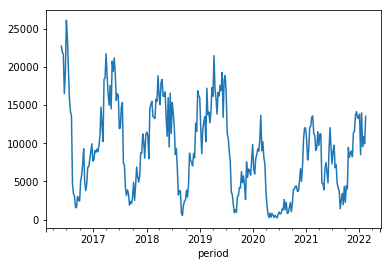

In [9]:
sorted_data['inc'][-300:].plot()

# Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année N au 1er septembre de l'année N+1.Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.Comme l'incidence de la varicelle est très faible en fin d'été, cette modification ne risque pas de fausser nos conclusions. Encore un petit détail: les données commencent fin 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [10]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes. Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

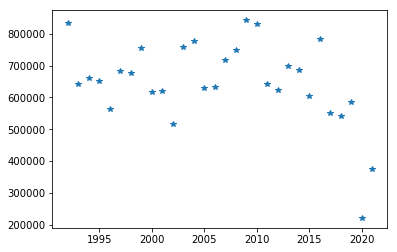

In [12]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin). On observe que l'épidémie a été la plus forte en 2009, et la plus faible en 2020.

In [13]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64